In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

Here is the explanation of each parameter used in the `make_classification` function call:

- **`n_samples=100`**: The total number of samples (data points) to generate.

- **`n_features=2`**: The total number of features (dimensions) for each sample.

- **`n_informative=1`**: The number of informative features that are useful for predicting the class labels.

- **`n_redundant=0`**: The number of redundant features, which are linear combinations of the informative features.

- **`n_classes=2`**: The number of classes (target labels) in the dataset, making it a binary classification problem.

- **`n_clusters_per_class=1`**: The number of clusters per class.

- **`random_state=41`**: The seed for the random number generator, ensuring reproducibility.

- **`hypercube=False`**: When `False`, clusters are placed randomly in the feature space.

- **`class_sep=10`**: The factor that controls the separability of the classes, with a larger value resulting in more easily separable classes.

In [43]:
X , y = make_classification (n_samples = 100 , n_features = 2 , n_informative = 1, n_redundant = 0 , n_classes = 2 , n_clusters_per_class = 1 , random_state = 41 , hypercube = False , class_sep = 20)

In [44]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


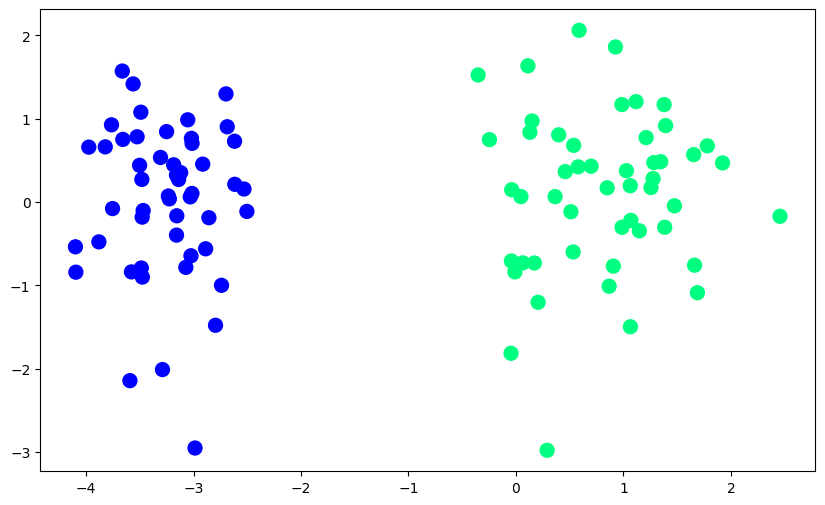

In [45]:
plt.figure(figsize=(10,6))

plt.scatter(X[: , 0] , X[: , 1] , c = y , cmap ='winter' , s = 100)

In [46]:
def perceptron(x , y) :

  x = np.insert(x , 0 , 1 ,axis = 1)
  weights = np.ones(x.shape[1])
  lr = 0.1

  for i in range (1000):
    idx = np.random.randint(0,100)
    y_hat = step(np.dot(x[idx] , weights) )
    weights = weights + lr * (y[idx] - y_hat) * x[idx]

  return weights[0] , weights[1:]

In [47]:
def step(z):
  return 1 if z >= 0 else 0

In [48]:
intercept_ , coef_ = perceptron(X,y)

In [49]:
print(intercept_)
print(coef_)

1.3000000000000003
[1.05343617 0.2221512 ]


In [50]:
# ax + by + c = 0
# m = - a / b
# b = - c / b

m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [51]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

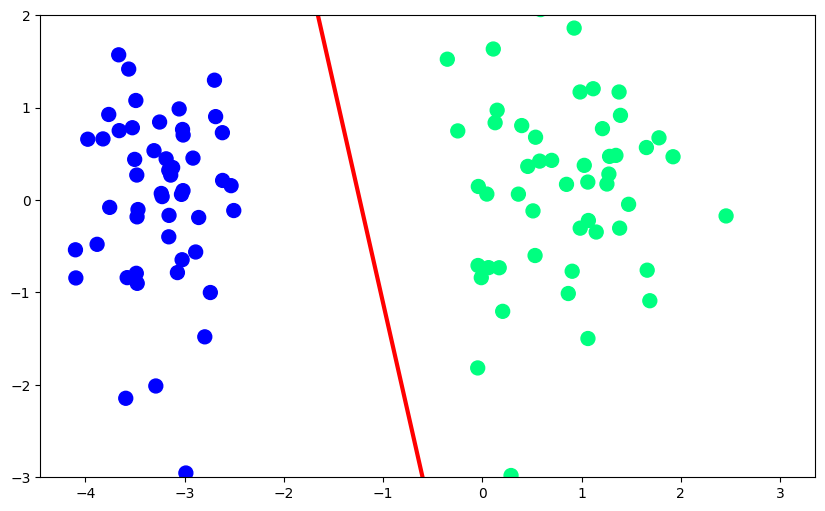

In [52]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [53]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(X,y)

LogisticRegression()

In [54]:
# ax + by + c = 0
# m = - a / b
# b = - c / b

m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [55]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

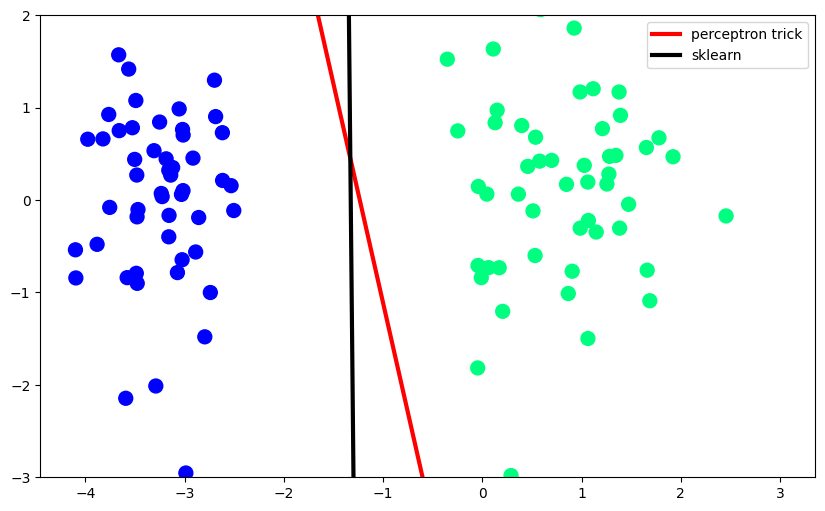

In [56]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',label = 'perceptron trick' , linewidth=3)
plt.plot(x_input1,y_input1,color='black', label ='sklearn' , linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.legend()